# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

From a data perspective, this involves building a predictive model. The target variable is the car's price. Independent variables will include features such as the car's make, model, year, odometer, condition, size, fuel type, and other relevant attributes. Using exploratory data analysis (EDA) and predictive modeling techniques, we will determine which factors have the most significant impact on used car prices.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
original_data = pd.read_csv('/content/vehicles.csv')

In [ ]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
original_data.sample(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
309469,7310058978,tulsa,0,2020.0,ford,mustang shelby gt500 coupe,excellent,NaN,gas,1015.0,clean,automatic,1FA6P8SJ3L5501102,NaN,NaN,coupe,NaN,ok
121846,7316427141,atlanta,25000,1995.0,ram,3500 4x4,NaN,NaN,diesel,131000.0,clean,manual,NaN,NaN,NaN,NaN,NaN,ga
279590,7307095763,rochester,4000,2005.0,NaN,Scion xB,good,4 cylinders,gas,110600.0,clean,automatic,NaN,fwd,NaN,NaN,NaN,ny
175060,7305066362,baton rouge,15590,2016.0,NaN,Scion iM Hatchback 4D,good,NaN,other,41036.0,clean,other,JTNKARJE5GJ518108,NaN,NaN,hatchback,blue,la
145929,7303366974,southern illinois,7995,2004.0,ford,f150 fx4 super crew 4x4,excellent,8 cylinders,gas,197757.0,clean,automatic,1FTPW14554KA11868,4wd,NaN,pickup,red,il
386503,7312851238,st george,70820,2020.0,toyota,sienna xle,excellent,6 cylinders,gas,11.0,clean,automatic,5TDYZ3DC9LS084352,NaN,NaN,van,NaN,ut
111929,7316215601,south florida,12000,2009.0,chevrolet,silverado,good,NaN,gas,76646.0,clean,automatic,1GCEC14X49Z227761,NaN,NaN,truck,red,fl
54371,7316861597,san diego,7000,2005.0,ram,2500 slt 4x4,fair,8 cylinders,gas,224000.0,clean,automatic,NaN,4wd,full-size,pickup,white,ca
250463,7313252665,central NJ,7600,2011.0,kia,sorento,NaN,4 cylinders,gas,97929.0,clean,automatic,5XYKTCA17BG180714,4wd,NaN,SUV,black,nj
158175,7307977462,des moines,25475,2016.0,jeep,wrangler unlimited,NaN,NaN,gas,91599.0,clean,automatic,1C4HJWDG1GL224171,4wd,NaN,convertible,silver,ia


In [ ]:
original_data['price'].describe()

,price
count,4.268800e+05
mean,7.519903e+04
std,1.218228e+07
min,0.000000e+00
25%,5.900000e+03
50%,1.395000e+04
75%,2.648575e+04
max,3.736929e+09


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
original_data.isna().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [ ]:
missing_percentage = original_data.isna().sum() * 100 / len(original_data)
missing_percentage

,0
id,0.000000
region,0.000000
price,0.000000
year,0.282281
manufacturer,4.133714
model,1.236179
condition,40.785232
cylinders,41.622470
fuel,0.705819
odometer,1.030735


In [ ]:
# clean the data: bc most useful columns have a high percentage of missing values. I add another category 'unknown' to deal with the missing value
data = original_data[['price','year','manufacturer','condition','cylinders','fuel','odometer','title_status','transmission','drive','type']]
data = data[data['price'] > 0]
data = data.dropna(subset=['year', 'odometer'])
data_cleaned = data.fillna('unknown')
data_cleaned.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type
27,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,unknown,pickup
28,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,unknown,pickup
29,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,unknown,pickup
30,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,unknown,pickup
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck


####EDA

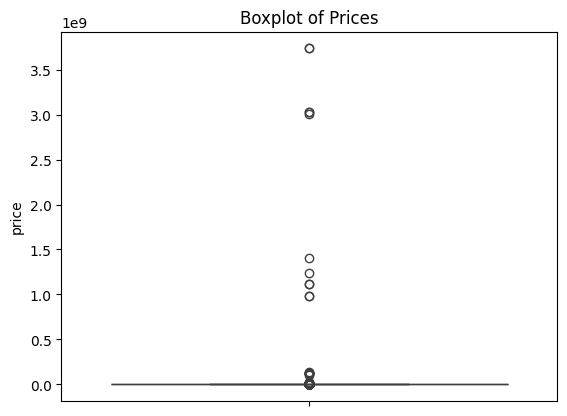

In [ ]:
#boxplot of price
sns.boxplot(data_cleaned['price'])
plt.title('Boxplot of Prices')
plt.show()

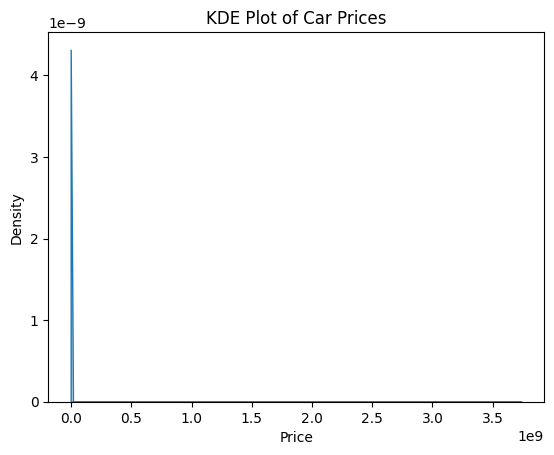

In [ ]:
# Create the KDE plot
sns.kdeplot(data_cleaned['price'], fill=True)
plt.title('KDE Plot of Car Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

In [ ]:
#calculate the log of price
data_cleaned['log_price'] = np.log(data_cleaned['price'])

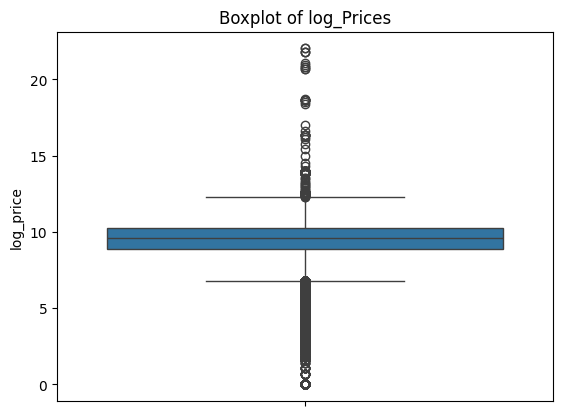

In [ ]:
#boxplot of log price
sns.boxplot(data_cleaned['log_price'])
plt.title('Boxplot of log_Prices')
plt.show()

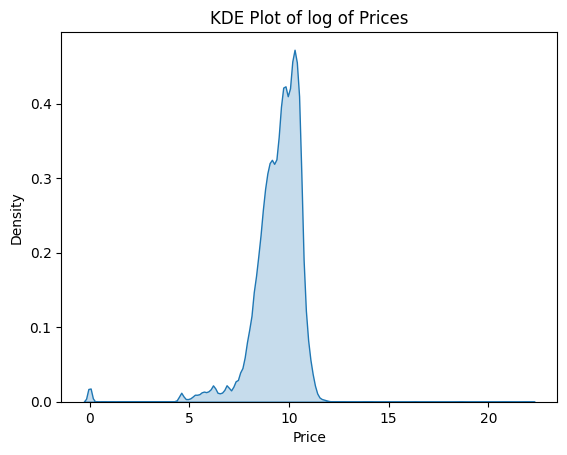

In [ ]:
# Create the KDE plot
sns.kdeplot(data_cleaned['log_price'], fill=True)
plt.title('KDE Plot of log of Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

**Because price is not normally distributed, so use the log of price as the target**

In [ ]:
#Remove outliers using IQR
Q1 = data_cleaned['log_price'].quantile(0.25)
Q3 = data_cleaned['log_price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned['is_outlier'] = (data_cleaned['log_price'] < lower_bound) | (data_cleaned['log_price'] > upper_bound)

# remove the outlier
data_without_outlier = data_cleaned[~data_cleaned['is_outlier']]
data_without_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377915 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         377915 non-null  int64  
 1   year          377915 non-null  float64
 2   manufacturer  377915 non-null  object 
 3   condition     377915 non-null  object 
 4   cylinders     377915 non-null  object 
 5   fuel          377915 non-null  object 
 6   odometer      377915 non-null  float64
 7   title_status  377915 non-null  object 
 8   transmission  377915 non-null  object 
 9   drive         377915 non-null  object 
 10  type          377915 non-null  object 
 11  log_price     377915 non-null  float64
 12  is_outlier    377915 non-null  bool   
dtypes: bool(1), float64(3), int64(1), object(8)
memory usage: 37.8+ MB


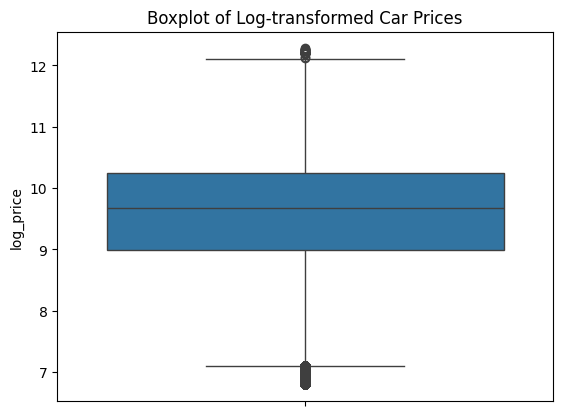

In [ ]:
sns.boxplot(data_without_outlier['log_price'])
plt.title('Boxplot of Log-transformed Car Prices')
plt.show()


In [ ]:
# Define column groups
categorical_cols = ['transmission', 'drive', 'type','fuel']
ordinal_cols = ['condition', 'cylinders', 'title_status']
numerical_cols = ['odometer','year']

In [ ]:
# Identify the correlations of numerical columns
corr = data_without_outlier[numerical_cols].corrwith(data_without_outlier['log_price'])
corr

,0
odometer,-0.220821
year,0.417939


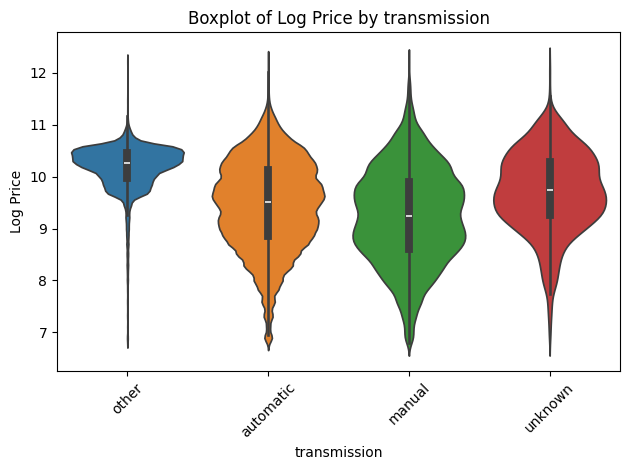

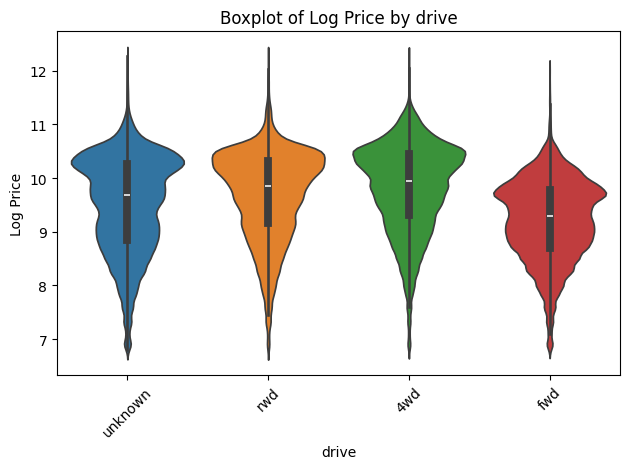

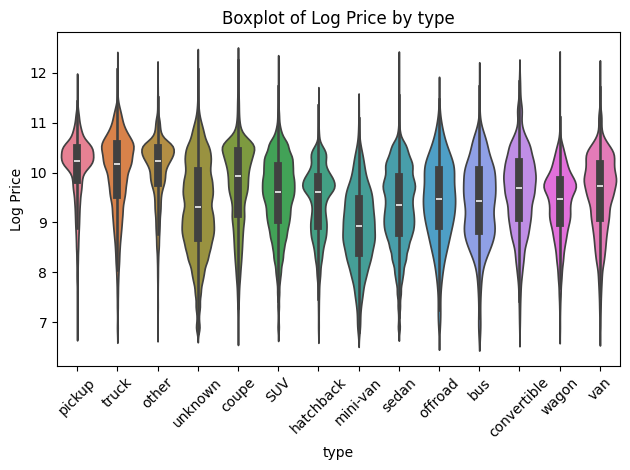

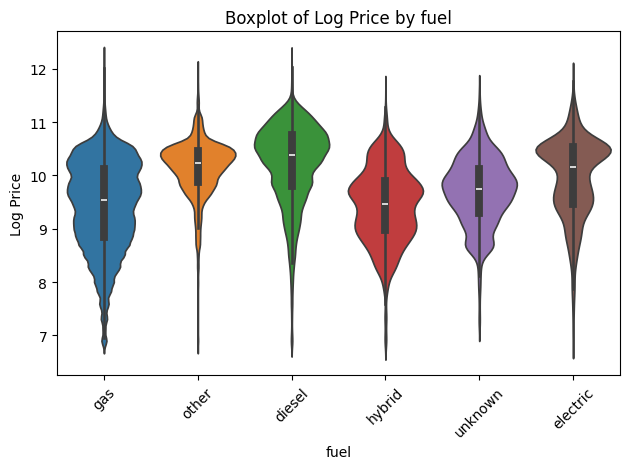

In [ ]:
#Identify the correlations of categorical columns
for col in categorical_cols:
    sns.violinplot(x=col, y='log_price', data=data_without_outlier,hue = col)
    plt.title(f'Boxplot of Log Price by {col}')
    plt.xlabel(col)
    plt.ylabel('Log Price')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# Print unique values for categorical columns
for col in categorical_cols:
  print(f"{col}: {data_without_outlier[col].unique()}")

# Print unique values for ordinal columns
for col in ordinal_cols:
  print(f"{col}: {data_without_outlier[col].unique()}")


transmission: ['other' 'automatic' 'manual' 'unknown']
drive: ['unknown' 'rwd' '4wd' 'fwd']
type: ['pickup' 'truck' 'other' 'unknown' 'coupe' 'SUV' 'hatchback' 'mini-van'
 'sedan' 'offroad' 'bus' 'convertible' 'wagon' 'van']
fuel: ['gas' 'other' 'diesel' 'hybrid' 'unknown' 'electric']
condition: ['good' 'excellent' 'fair' 'unknown' 'like new' 'new' 'salvage']
cylinders: ['8 cylinders' '6 cylinders' 'unknown' '4 cylinders' '5 cylinders'
 '3 cylinders' '10 cylinders' 'other' '12 cylinders']
title_status: ['clean' 'rebuilt' 'lien' 'unknown' 'salvage' 'missing' 'parts only']


**Prepocessing the columns**

In [ ]:
# Map ordinal data
ordinal_mappings = {
    'condition': {'unknown':0, 'salvage': 1, 'fair': 2, 'good': 3, 'excellent': 4, 'like new': 5, 'new': 6},
    'cylinders': {'unknown':-1, 'other':0, '3 cylinders': 3, '4 cylinders': 4, '5 cylinders': 5, '6 cylinders': 6,
                  '8 cylinders': 8, '10 cylinders': 10, '12 cylinders': 12},
    'title_status': {'unknown':0, 'missing': 1, 'parts only': 2, 'salvage': 3, 'lien': 4, 'rebuilt': 5, 'clean': 6},
}
for col, mapping in ordinal_mappings.items():
    data_without_outlier[col] = data_without_outlier[col].map(mapping)


# Handle the 'manufacturer' column (frequency encoding)
data_without_outlier['manufacturer_freq'] = data_without_outlier['manufacturer'].map(data_without_outlier['manufacturer'].value_counts())

# One-Hot Encoding for categorical columns
data_encoded = pd.get_dummies(data_without_outlier, columns=categorical_cols, drop_first=True)

# Updated column groups
encoded_categorical_cols = [col for col in data_encoded.columns if any(orig_col in col for orig_col in categorical_cols)]
ordinal_cols = ['condition', 'cylinders', 'title_status']
numerical_cols = ['odometer', 'year']


# define X and y
X = pd.concat([data_encoded[encoded_categorical_cols],data_without_outlier[ordinal_cols],data_without_outlier[numerical_cols],data_without_outlier['manufacturer_freq']],axis = 1)
y = data_without_outlier['log_price']



<ipython-input-559-10d09a77fed6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outlier[col] = data_without_outlier[col].map(mapping)
<ipython-input-559-10d09a77fed6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_without_outlier[col] = data_without_outlier[col].map(mapping)
<ipython-input-559-10d09a77fed6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical and ordinal features
scaler = StandardScaler()
X_train[['condition', 'cylinders', 'title_status','odometer', 'year','manufacturer_freq']] = scaler.fit_transform(X_train[['condition', 'cylinders', 'title_status','odometer', 'year','manufacturer_freq']])
X_test[['condition', 'cylinders', 'title_status','odometer', 'year','manufacturer_freq']] = scaler.transform(X_test[['condition', 'cylinders', 'title_status','odometer', 'year','manufacturer_freq']])


In [ ]:
X_train.shape

(302332, 30)

**Select Features using Lasso Model**

In [ ]:
# choose the best alpha using GridSearchCV
alpha_values = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]

lasso = Lasso()
param_grid = {'alpha': alpha_values}

grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',  # Negative MSE for regression
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available processors
)

grid_search.fit(X_train, y_train)

# Get the best alpha value
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)


Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Alpha: 1e-06


In [ ]:
# Extract selected features
lasso = Lasso(alpha=best_alpha)
lasso.fit(X_train, y_train)

selected_features = X_train.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features)

Selected Features: Index(['transmission_manual', 'transmission_other', 'transmission_unknown',
       'drive_fwd', 'drive_rwd', 'drive_unknown', 'type_bus',
       'type_convertible', 'type_coupe', 'type_hatchback', 'type_mini-van',
       'type_offroad', 'type_other', 'type_pickup', 'type_sedan', 'type_truck',
       'type_unknown', 'type_van', 'type_wagon', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'fuel_unknown', 'condition', 'cylinders',
       'title_status', 'odometer', 'year', 'manufacturer_freq'],
      dtype='object')


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

**Build a Lasso Model**

In [ ]:
# Build a Lasso model
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

Lasso_model = Lasso(alpha=best_alpha)
Lasso_model.fit(X_train_selected, y_train)

# Evaluate lasso model
Lasso_y_pred = final_model.predict(X_test_selected)
Lasso_mse = mean_squared_error(y_test, final_y_pred)
print(f"Lasso Regression with Best Alpha Mean Squared Error: {Lasso_mse}")

Lasso Regression with Best Alpha Mean Squared Error: 0.43105823249355074


In [ ]:
lasso_coefficients = Lasso_model.coef_
lasso_feature_names = X_test_selected.columns.tolist()

lasso_coef_df = pd.DataFrame({
    'Feature': lasso_feature_names,
    'Coefficient': lasso_coefficients
})

lasso_coef_df['Absolute Coefficient'] = lasso_coef_df['Coefficient'].abs()
lasso_coef_df = lasso_coef_df.sort_values(by='Absolute Coefficient', ascending=False)
lasso_coef_df

,Feature,Coefficient,Absolute Coefficient
20,fuel_gas,-0.592229,0.592229
21,fuel_hybrid,-0.499105,0.499105
1,transmission_other,0.469554,0.469554
3,drive_fwd,-0.445376,0.445376
23,fuel_unknown,-0.393886,0.393886
22,fuel_other,-0.387724,0.387724
7,type_convertible,0.349916,0.349916
19,fuel_electric,-0.335154,0.335154
28,year,0.308879,0.308879
15,type_truck,0.283393,0.283393


**Build a Ridge Model (degree=2)**

In [ ]:
# Generate Polynomial Features
degree = 2
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

In [ ]:
# Set up Ridge Regression with GridSearchCV
alpha_values = [0.1, 1, 10,100]
ridge = Ridge()

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_poly, y_train)

# Extract the best model and its alpha value
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha for Ridge Regression: {best_alpha}")

# Evaluate the Best Ridge Model
ridge_y_pred = best_ridge_model.predict(X_test_poly)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f"Ridge Regression (degree={degree}) with Best Alpha Mean Squared Error: {ridge_mse}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Alpha for Ridge Regression: 10
Ridge Regression (degree=2) with Best Alpha Mean Squared Error: 0.23798833418455892


In [ ]:
# Get the coefficients of the Ridge Model
feature_names = poly.get_feature_names_out(X_train_selected.columns)
ridge_coefficients = best_ridge_model.coef_
ridge_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coefficients
})
ridge_coef_df['Absolute Coefficient'] = ridge_coef_df['Coefficient'].abs()  # Add absolute value for sorting
ridge_coef_df = ridge_coef_df.sort_values(by='Absolute Coefficient', ascending=False)
ridge_coef_df

,Feature,Coefficient,Absolute Coefficient
28,year,0.810184,0.810184
82,transmission_other fuel_unknown,0.557161,0.557161
47,transmission_manual type_van,0.537348,0.537348
231,type_convertible fuel_electric,-0.483594,0.483594
65,transmission_other type_bus,-0.476026,0.476026
...,...,...,...
312,type_offroad type_wagon,0.000000,0.000000
313,type_offroad fuel_electric,0.000000,0.000000
197,type_bus type_coupe,0.000000,0.000000
315,type_offroad fuel_hybrid,0.000000,0.000000


**Build a Ridge Model (degree=1)**

In [ ]:
degree = 1
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_selected)
X_test_poly = poly.transform(X_test_selected)

# Set up Ridge Regression with GridSearchCV
alpha_values = [0.1, 1, 10,100]
ridge = Ridge()

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(
    estimator=ridge,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_poly, y_train)

# Extract the best model and its alpha value
best_ridge_model = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha for Ridge Regression: {best_alpha}")

# Evaluate the Best Ridge Model
ridge_y_pred = best_ridge_model.predict(X_test_poly)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f"Ridge Regression (degree={degree}) with Best Alpha Mean Squared Error: {ridge_mse}")

# Get the coefficients of the Ridge Model
feature_names = poly.get_feature_names_out(X_train_selected.columns)
ridge_coefficients = best_ridge_model.coef_
ridge_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coefficients
})
ridge_coef_df['Absolute Coefficient'] = ridge_coef_df['Coefficient'].abs()  # Add absolute value for sorting
ridge_coef_df = ridge_coef_df.sort_values(by='Absolute Coefficient', ascending=False)
ridge_coef_df

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Alpha for Ridge Regression: 10
Ridge Regression (degree=1) with Best Alpha Mean Squared Error: 0.4310607579607615


,Feature,Coefficient,Absolute Coefficient
20,fuel_gas,-0.591073,0.591073
21,fuel_hybrid,-0.496696,0.496696
1,transmission_other,0.469316,0.469316
3,drive_fwd,-0.445327,0.445327
23,fuel_unknown,-0.390564,0.390564
22,fuel_other,-0.386276,0.386276
7,type_convertible,0.349151,0.349151
19,fuel_electric,-0.331477,0.331477
28,year,0.308864,0.308864
15,type_truck,0.283465,0.283465


**Building a Regression Model**

In [ ]:
# Build a Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train_selected, y_train)

linear_y_pred = linear_model.predict(X_test_selected)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f"Linear Regression Mean Squared Error: {linear_mse}")

Linear Regression Mean Squared Error: 0.43106208295983806


In [ ]:
linear_coefficients = linear_model.coef_
linear_feature_names = X_train_selected.columns.tolist()

linear_coef_df = pd.DataFrame({
    'Feature': linear_feature_names,
    'Coefficient': linear_coefficients
})

linear_coef_df['Absolute Coefficient'] = linear_coef_df['Coefficient'].abs()
linear_coef_df = linear_coef_df.sort_values(by='Absolute Coefficient', ascending=False)
linear_coef_df


,Feature,Coefficient,Absolute Coefficient
20,fuel_gas,-0.592316,0.592316
21,fuel_hybrid,-0.499268,0.499268
1,transmission_other,0.469572,0.469572
3,drive_fwd,-0.445367,0.445367
23,fuel_unknown,-0.394162,0.394162
22,fuel_other,-0.387837,0.387837
7,type_convertible,0.349968,0.349968
19,fuel_electric,-0.335490,0.335490
28,year,0.308881,0.308881
15,type_truck,0.283388,0.283388


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Model Evaluation**
1. Lasso Model MSE: 0.43
2. Ridge Model with (degree =2): 0.24; Ridge Model with (degree =1): 0.43
3. Linear Regression Model: 0.43

In comparison, the Ridge Model with degree=2 has the smallest error. However a higher degree won't make the model very explainable. Some of the combinations just don't make much sense in terms of business context.

With degree =1, all three models has more or less the same MSE = 0.43 and also similar feature rankings.

**To be revisited later**
- Missing values imputation: I created an 'unknown' category for the missing values for now. Considering the percentage of missing values are quite high around 20%-30%, there probably should be a better way to deal with those data.

- Explore other ways to select features like sequential selection. See if they can generate better models. For now the featares are quite a lot.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Business Insights**
- Car type, Transmission, Drive and Year are the top drivers of the price.
- Especially the type of car is the most important. Convertible>truck>pickup... Bus, minivan, hatchback have negative coefficients, suggesting they are not very welcome in the market.
- Condition, title status, number of cylinders, Manufacturer doesn't have much influencing power.
- Front-wheel drive vehichles are less valued compared to other types since drive_fwd has a negative coefficient
- Non-standard transmissions add values like dual-clutch. Its coeeficient is very high.


